In [5]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np
import torch

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager
from src.data_managers.sample_graph import SampleGraphDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [7]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-12-14 22:55:51,195] A new study created in memory with name: no-name-093945c4-e3b6-4a5f-9172-3e504c2b9b7c
[I 2024-12-14 22:55:51,367] Trial 0 finished with value: 0.30539138970798224 and parameters: {'booster': 'gblinear', 'lambda': 0.0004095797232588374, 'alpha': 0.00034725526362376413}. Best is trial 0 with value: 0.30539138970798224.
[I 2024-12-14 22:55:51,492] Trial 1 finished with value: 0.28001182482531245 and parameters: {'booster': 'gblinear', 'lambda': 4.902179036769397e-06, 'alpha': 2.3267262582136677e-08}. Best is trial 0 with value: 0.30539138970798224.


New best score: 0.305
Best model performance:
Accuracy: 0.682 ± 0.086
F1 Macro: 0.668 ± 0.076
F1 Weighted: 0.671 ± 0.081
[{'acc': 0.5454545454545454, 'f1_macro': np.float64(0.5454545454545454), 'f1_weighted': np.float64(0.5454545454545454)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-14 22:55:51,724] Trial 2 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 0.0022052282700910863, 'alpha': 5.869325532460715e-06, 'max_depth': 7, 'eta': 0.02919206057923906, 'gamma': 0.006649446468480507, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.009135363528771501, 'skip_drop': 0.6520826391681942}. Best is trial 0 with value: 0.30539138970798224.
[I 2024-12-14 22:55:51,896] Trial 3 finished with value: 0.23578778812922616 and parameters: {'booster': 'gbtree', 'lambda': 1.0675242942259726e-05, 'alpha': 0.00013755708722768863, 'max_depth': 2, 'eta': 0.2396393689919449, 'gamma': 3.587760471028791e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.30539138970798224.
[I 2024-12-14 22:55:52,091] Trial 4 finished with value: 0.2149085674931129 and parameters: {'booster': 'gbtree', 'lambda': 1.8531570240899914e-08, 'alpha': 1.1455287525275366e-05, 'max_depth': 2, 'eta': 2.96619414

New best score: 0.331
Best model performance:
Accuracy: 0.700 ± 0.061
F1 Macro: 0.685 ± 0.051
F1 Weighted: 0.689 ± 0.057
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]
New best score: 0.358
Best model performance:
Accuracy: 0.716 ± 0.087
F1 Macro: 0.705 ± 0.085
F1 Weighted: 0.709 ± 0.088
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666

[I 2024-12-14 22:55:52,516] Trial 7 finished with value: 0.07498688884758245 and parameters: {'booster': 'gblinear', 'lambda': 4.835121700484048e-06, 'alpha': 0.46044971459406725}. Best is trial 6 with value: 0.35792935306173546.
[I 2024-12-14 22:55:52,678] Trial 8 finished with value: 0.2523998390074793 and parameters: {'booster': 'gbtree', 'lambda': 2.0269213708874432e-08, 'alpha': 4.039783991219041e-06, 'max_depth': 1, 'eta': 0.0002640141093836577, 'gamma': 0.34010129439989306, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.35792935306173546.
[I 2024-12-14 22:55:52,800] Trial 9 finished with value: 0.3630055188416464 and parameters: {'booster': 'gblinear', 'lambda': 0.0013378113438523194, 'alpha': 4.033986731276054e-05}. Best is trial 9 with value: 0.3630055188416464.


New best score: 0.363
Best model performance:
Accuracy: 0.718 ± 0.053
F1 Macro: 0.709 ± 0.043
F1 Weighted: 0.713 ± 0.049
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.696969696969697), 'f1_weighted': np.float64(0.696969696969697)}]


[I 2024-12-14 22:55:53,052] Trial 10 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 0.594183009963121, 'alpha': 0.00588170050293781, 'max_depth': 9, 'eta': 1.9872557688756996e-08, 'gamma': 9.324749219258365e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.2436584468397362e-08, 'skip_drop': 7.027968976546954e-08}. Best is trial 9 with value: 0.3630055188416464.
[I 2024-12-14 22:55:53,256] Trial 11 finished with value: 0.21534604040404037 and parameters: {'booster': 'gbtree', 'lambda': 7.382160468798059e-05, 'alpha': 0.12993960171800492, 'max_depth': 4, 'eta': 0.0005137815063864883, 'gamma': 0.0005086563030597245, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 0.3630055188416464.
[I 2024-12-14 22:55:53,381] Trial 12 finished with value: 0.30369610906354155 and parameters: {'booster': 'gblinear', 'lambda': 0.02183519543147256, 'alpha': 0.006223528325223159}. Best is trial 9 with value: 

New best score: 0.387
Best model performance:
Accuracy: 0.736 ± 0.034
F1 Macro: 0.723 ± 0.029
F1 Weighted: 0.727 ± 0.035
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-12-14 22:55:55,807] Trial 27 finished with value: 0.3464285732685259 and parameters: {'booster': 'gblinear', 'lambda': 0.1311253184587, 'alpha': 0.033161609191342624}. Best is trial 25 with value: 0.38674452616677657.
[I 2024-12-14 22:55:55,951] Trial 28 finished with value: 0.3299285598317766 and parameters: {'booster': 'gblinear', 'lambda': 0.19468120985787304, 'alpha': 0.017961408587721522}. Best is trial 25 with value: 0.38674452616677657.
[I 2024-12-14 22:55:56,079] Trial 29 finished with value: 0.30539138970798224 and parameters: {'booster': 'gblinear', 'lambda': 0.001202847171143667, 'alpha': 0.00022214837586260723}. Best is trial 25 with value: 0.38674452616677657.
[I 2024-12-14 22:55:56,221] Trial 30 finished with value: 0.34597445341592675 and parameters: {'booster': 'gblinear', 'lambda': 0.007187475040853887, 'alpha': 0.10830421315127077}. Best is trial 25 with value: 0.38674452616677657.
[I 2024-12-14 22:55:56,345] Trial 31 finished with value: 0.2854416311893235 an

Best model performance:
Accuracy: 0.736 ± 0.034
F1 Macro: 0.723 ± 0.029
F1 Weighted: 0.727 ± 0.035
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.10803969151573148, 'alpha': 0.028531484130946163}


In [26]:
from src.evals.mogonet import MOGONETEvaluator

mogonet_eval = MOGONETEvaluator(
    data_manager=SampleGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "graph_style": "threshold",
            "self_connections": True,
            "avg_degree": 5,
        },
    ),
    n_trials=1,
    params={
        "encoder_hidden_channels": {
            "mrna": 64,
            "mirna": 64,
            "circrna": 64,
            "te": 64,
        },
        "encoder_type": "gat",
        "dropout": 0.2,
        "integrator_type": "vcdn", # vcdn seems to work better on mds disease
        "integration_in_dim": 16,
        "vcdn_hidden_channels": 16,
        "epochs": 250,
        "log_interval": 251,
    },
    save_model_path="mogonet_risk_best_models/model",
)
mogonet_eval.in_channels, mogonet_eval.omic_names
mogonet_eval.evaluate()

([200, 200, 200], ['mrna', 'mirna', 'circrna'])

In [64]:
feat_importances = mogonet_eval.feature_importance("mogonet_risk_best_models")

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

100%|██████████| 5/5 [00:57<00:00, 11.43s/it]


In [22]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}
{'ENSG00000239839': [0.38047727942466736, -0.356097012758255], 'ENSG00000064687': [0.00026656995760276914, -0.00040179057396017015], 'ENSG00000254995': [-0.0006574445869773626, 0.0006502361502498388], 'ENSG00000240247': [0.15297645330429077, -0.11119737476110458], 'ENSG00000163221': [0.23033440113067627, -0.20281295478343964], 'ENSG00000206047': [0.05446198210120201, -0.035946015268564224], 'ENSG00000122224': [0.23109041154384613, -0.22493819892406464], 'ENSG00000188153': [-0.24022984504699707, 0.23285269737243652], 'ENSG00000233822': [0.3006872236728668, -0.2653878629207611], 'ENSG00000091181': [0.04774503409862518, -0.04665199667215347], 'ENSG00000138131': [1.3247710739960894e-05, -2.784993739624042e-05], 'ENSG00000075275': [0.1283620148897171, -0.12988659739494324], 'ENSG00000106976': [-0.08479155600070953, 0.08472488820552826], 'ENSG00000111249': [0.080314368009567

In [65]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

te = pl.read_csv("mds_data/preprocessed_74/te_counts.csv")
te_names = te['TE'].to_list()

# add "TE: " to all te features
te_names = {x : f"TE: {x}" for x in te_names}

# Create a new dictionary with the updated keys
fi_nn = {te_names.get(k, k): v for k, v in fi_nn.items()}

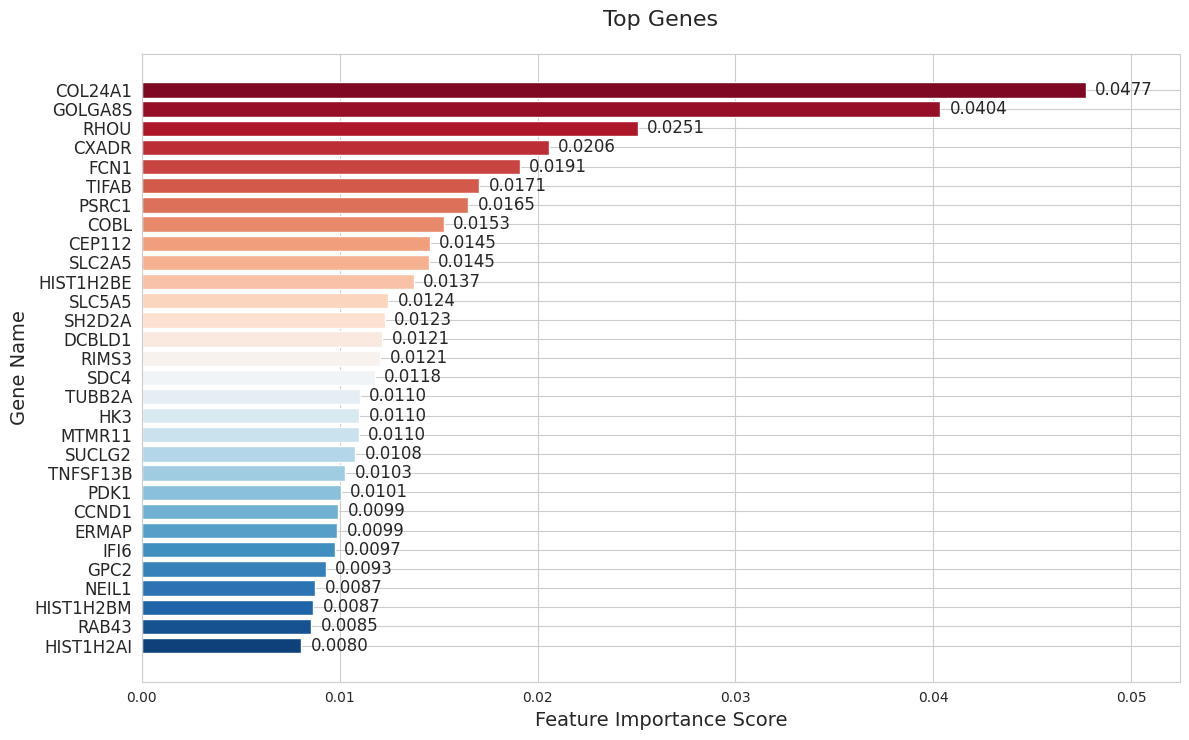

In [66]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(
    fi_nn,
    n_genes=30, 
    title="Top Genes",
    save_file="plots/risk/mds_risk.png"
)

- [Arrayed molecular barcoding identifies TNFSF13 as a positive regulator of acute myeloid leukemia-initiating cells](https://pmc.ncbi.nlm.nih.gov/articles/PMC6886409/)
- [PI3K-dependent Reprogramming of Hexokinase Isoforms Regulates B Lymphocyte Metabolism, i.e. HK3 and HK2](https://journals.aai.org/jimmunol/article/204/1_Supplement/151.30/64960/PI3K-dependent-Reprogramming-of-Hexokinase) and [PI3-kinase deletion promotes myelodysplasia by dysregulating autophagy in hematopoietic stem cells, i.e. PI3-kinase is directly linked to myelodysplastic syndrome](https://www.science.org/doi/10.1126/sciadv.ade8222?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed)
- [COL24A1 is enhanced in leukemia and myeloma as per protein atlas](https://www.proteinatlas.org/ENSG00000171502-COL24A1/cell+line)
- [GOLGA8S is enchanced in myeloma and also slightly in leukemia as per protein atlas](https://www.proteinatlas.org/ENSG00000261739-GOLGA8S/cell+line#leukemia)

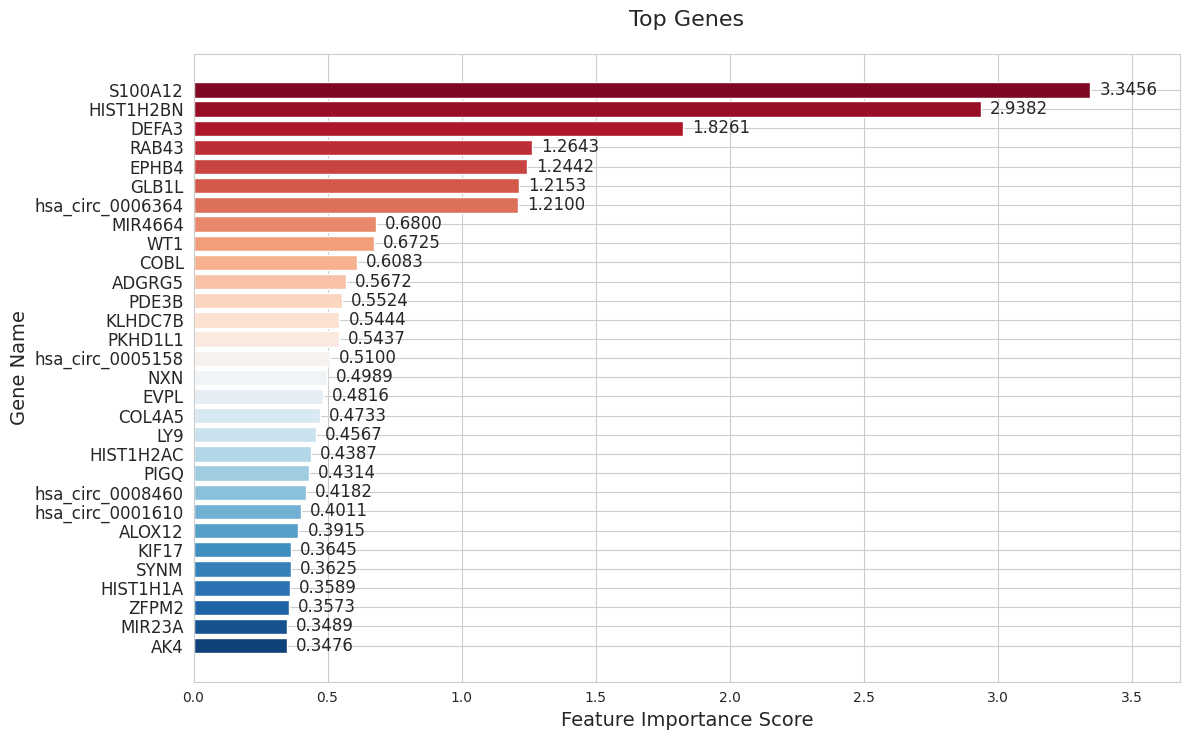

In [25]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(
    fi_nn,
    n_genes=30, 
    title="Top Genes",
    save_file="plots/risk/mds_risk_fi_mrna_only.png"
)

In [68]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 60
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [69]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(33), tensor(34.), tensor(62.))

8934


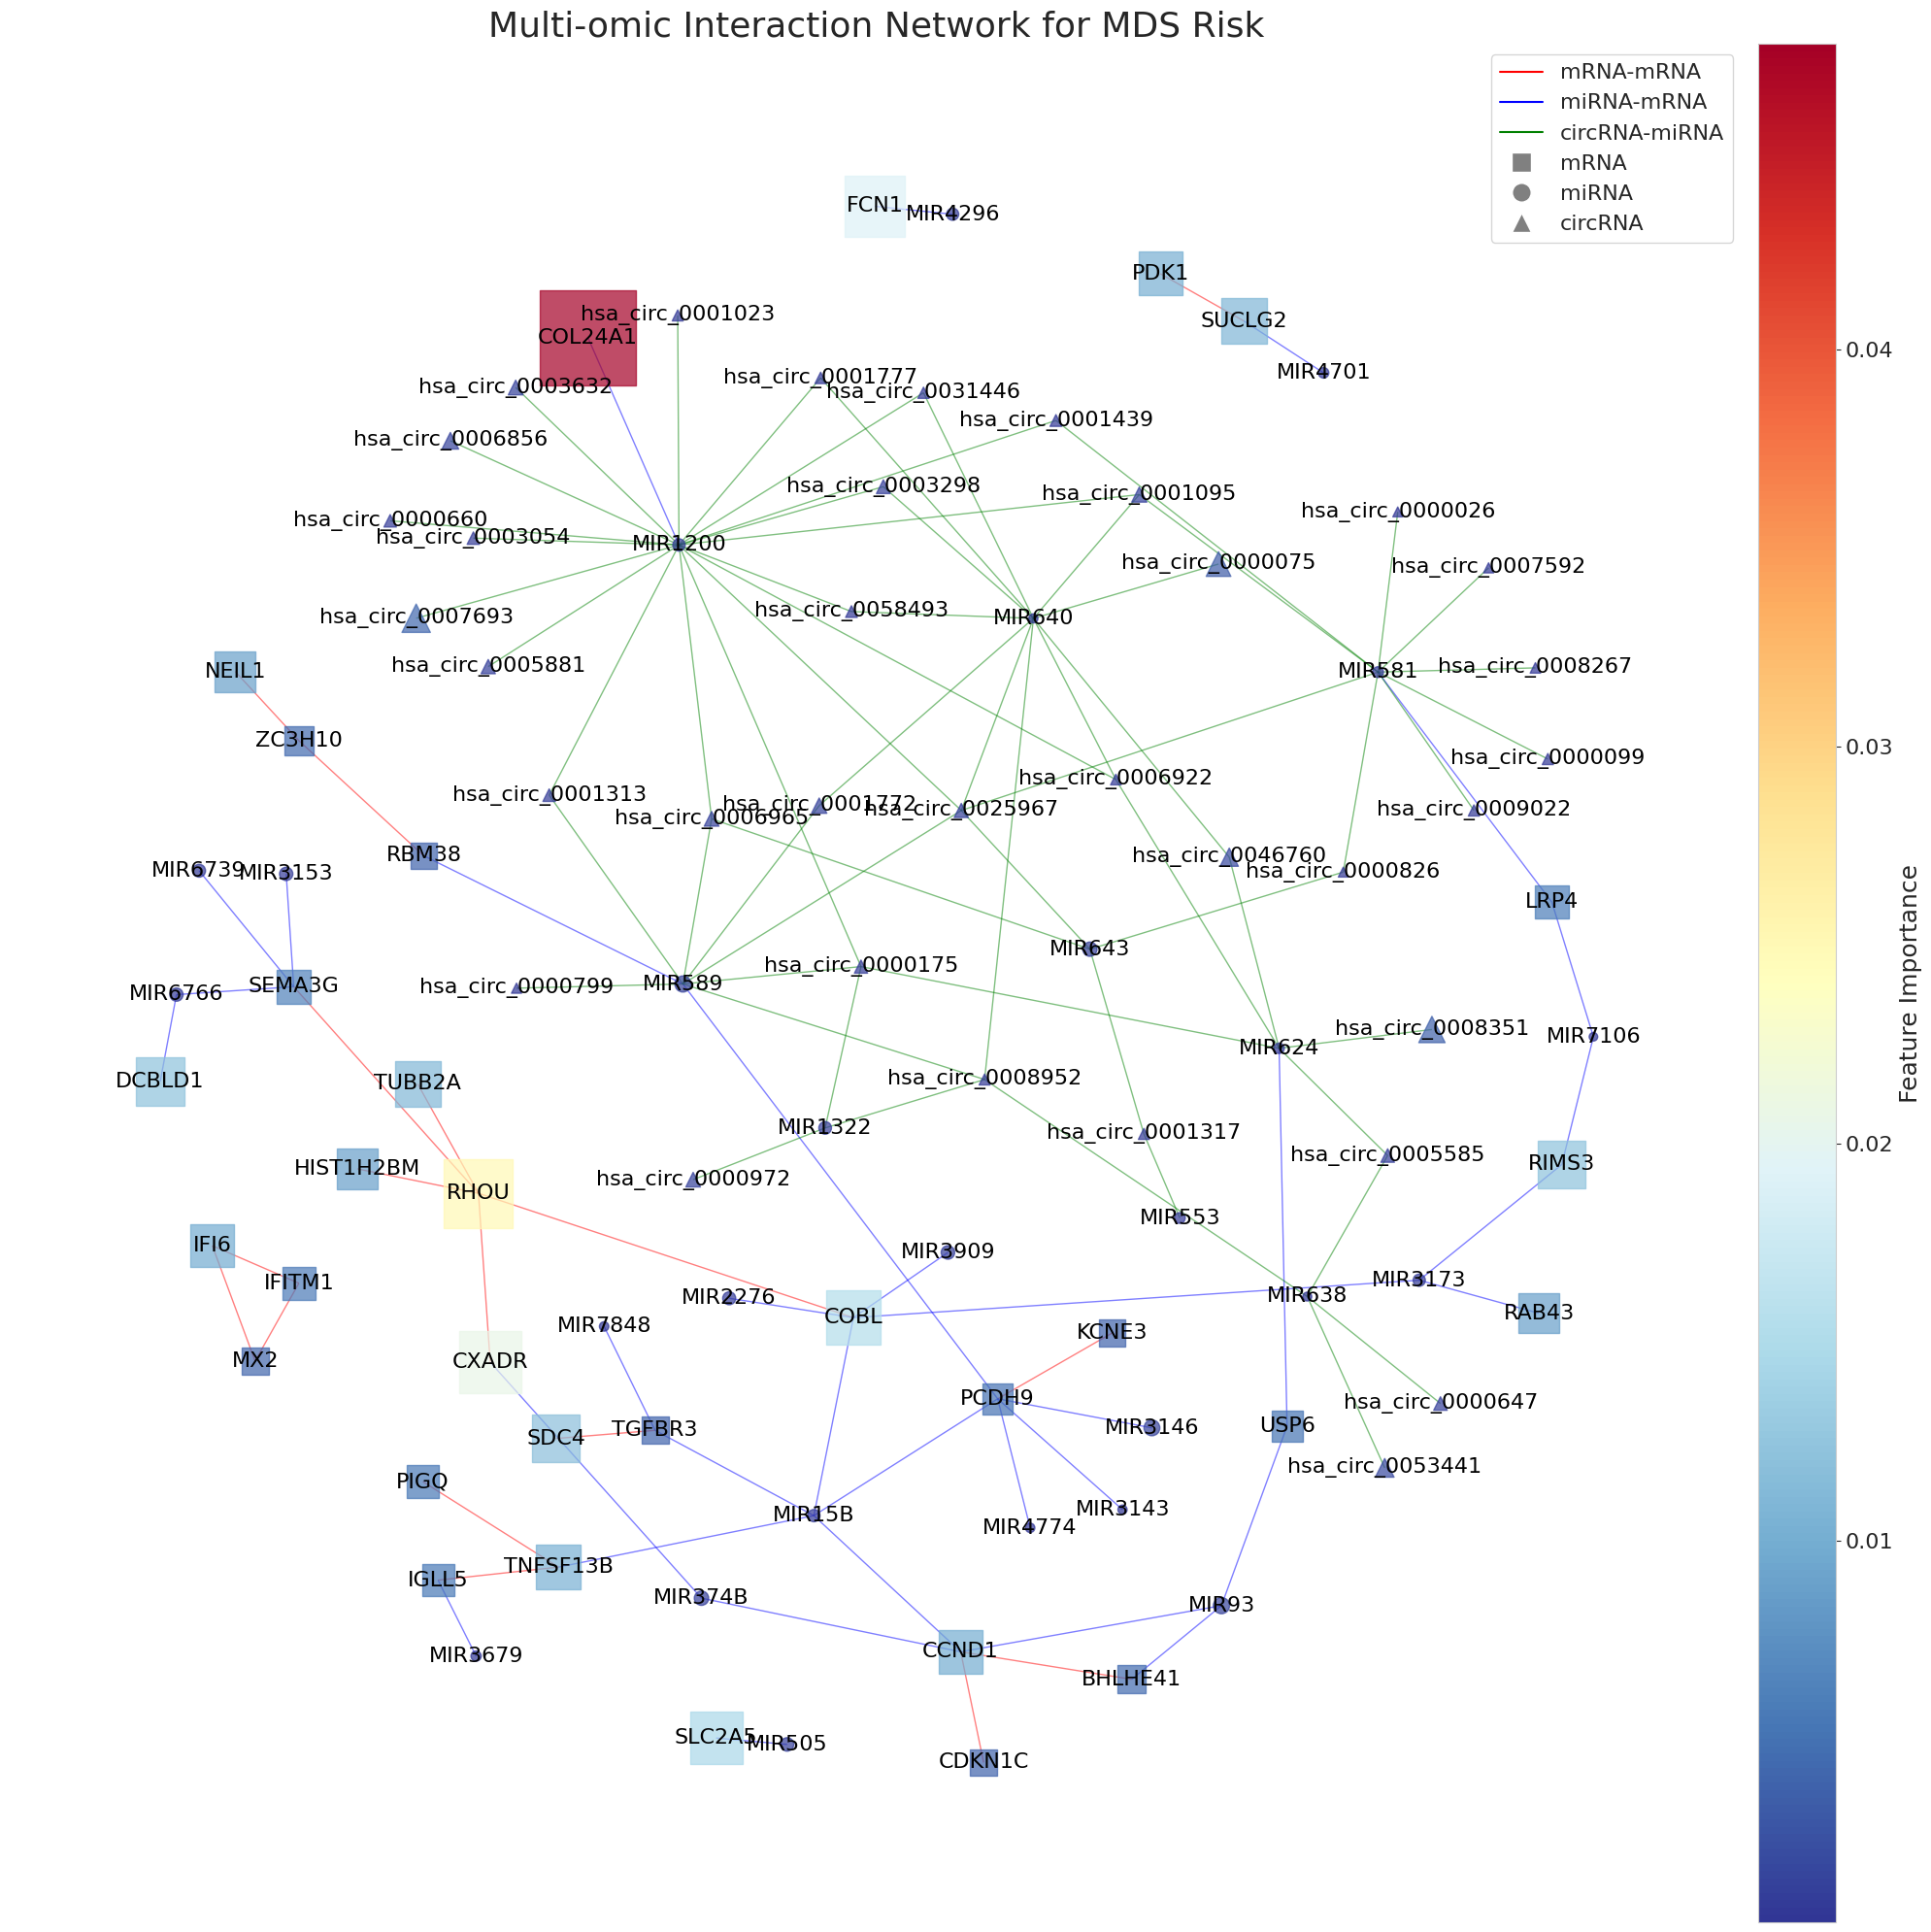

In [70]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
# seed = 4580 # - risk
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Risk",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
fig.savefig('plots/risk/multi_omic_network_genes_small.png', dpi=400)

- the DEFA gene family which has high scores here has been associated with different types of cancer but not with MDS it seems
- [Whole blood defensin mRNA expression is a predictive biomarker of docetaxel response in castration-resistant prostate cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC4527520/) 
- [S100A12 is a promising biomarker in papillary thyroid cancer](https://www.nature.com/articles/s41598-020-58534-1)
- [S100A8, S100A9 and S100A12 are strongly correlated with the occurrence and development of cancer](https://onlinelibrary.wiley.com/doi/10.1111/imm.13722)
- [S100A9 induces differentiation of acute myeloid leukemia cells through TLR4](https://pubmed.ncbi.nlm.nih.gov/28137827/)
- [S100 Proteins in Acute Myeloid Leukemia](https://pubmed.ncbi.nlm.nih.gov/30366122/)
- [Roles of Histone Deacetylases in Acute Myeloid Leukemia With Fusion Proteins](https://pmc.ncbi.nlm.nih.gov/articles/PMC8440836/) and [https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8](https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8)
- we have three histone genes here as important features
    - HIST1H2BN 4.245093017816544
    - HIST1H2AC 1.6199357211589813
    - HIST1H1A 1.2683670080441516

In [51]:
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

<Figure size 640x480 with 0 Axes>

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)

In [79]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 50
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = (
    results
    .filter(pl.col("Adjusted P-value") < 0.05)
    .select(["Gene_set", "Term", "Adjusted P-value", "Genes"])
    .sort("Adjusted P-value")
)
significant_results = significant_results

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=1000, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (15, 4)
+-----------------------------+---------------------------------------------------+------------------+-------------------------------------------------------------------------------------------------+
| Gene_set                    | Term                                              | Adjusted P-value | Genes                                                                                           |
| ---                         | ---                                               | ---              | ---                                                                                             |
| str                         | str                                               | f64              | str                                                                                             |
+====================================================================================================================================================================================

In [80]:
with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=500, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (111, 4)
+-----------------------------+--------------------------------------------------------------------------+------------------+--------------------------------------------------------------------------+
| Gene_set                    | Term                                                                     | Adjusted P-value | Genes                                                                    |
| ---                         | ---                                                                      | ---              | ---                                                                      |
| str                         | str                                                                      | f64              | str                                                                      |
+===================================================================================================================================================================================

In [81]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=[
        "GO_Biological_Process_2023",
        "GO_Molecular_Function_2023",
        "GO_Cellular_Component_2023",
        # "Jensen_DISEASES",
        # "Human_Phenotype_Ontology"
    ],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)

significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (15, 4)
+----------------------------+---------------------------------------------------------------------------+------------------+--------------------------------------------------------------------------+
| Gene_set                   | Term                                                                      | Adjusted P-value | Genes                                                                    |
| ---                        | ---                                                                       | ---              | ---                                                                      |
| str                        | str                                                                       | f64              | str                                                                      |
+====================================================================================================================================================================================